In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def legendre_poly(n,m, x):
    if n==1 and m==0:
        return np.cos(x)
    elif n==2 and m==0:
        return 1 / 2 * (3 * np.cos(x) ** 2 - 1)
    elif n==3 and m==0:
        return 1 / 2 * (5 * np.cos(x) ** 3 - 3 * np.cos(x))
    elif n==4 and m==0:
        return 1 / 8 * (35 * np.cos(x) ** 4 - 30 * np.cos(x) ** 2 + 3)
    elif n==1 and m==1:
        return -np.sin(x)
    elif n==2 and m==1:
        return -3 * np.cos(x) * np.sin(x)
    elif n==2 and m==2:
        return 0
 

In [16]:
def legendre_poly_prime(n, m,x):
    if n==1 and m==0:
        return 1
    elif n==2 and m==0:
        return 1 / 2 * 3 * 2 * np.cos(x)
    elif n==3 and m==0:
        return 1 / 2 * (-3 + 3 * 5 * np.cos(x) ** 2)
    elif n==4 and m==0: 
        return 1/8 * (-2 * 30 * np.cos(x) + 35 * 4 * np.cos(x) ** 3)
    elif n==1 and m==1:
        return np.cos(x) / np.sin(x)
    elif n==2 and m==1:
        return -3 * (np.sin(x) - 1 / np.sin(x))
    elif n==2 and m==2:
        return 0


In [25]:
def field_polar(r, theta, n, m, B, B_tilde, C, C_tilde):
    u_r = 0
    for i in range(1, n+1):
        for j in range(0, m):
            u_r +=  ((i + 1) * legendre_poly(i, j, theta) / r ** (i+2) * (r ** 2 / a ** 2 - 1)
                     * (np.cos(j*np.pi/2) * B[i-1, j] + np.sin(j*np.pi/2) * B_tilde[i-1, j]))
            print(i, j, C[i, j])
        
    u_theta = 0
    for i in range(1, n+1):
        for j in range(0, m):
            u_theta += (np.sin(theta) * legendre_poly_prime(i, j, theta)
                        * ((i - 2) / (i * a ** 2 * r ** i) - 1 / (r ** (i + 2))) 
                        * (np.cos(j*np.pi/2) * B[i-1, j] + np.sin(j*np.pi/2) * B_tilde[i-1, j])
                        + j * legendre_poly(i, j, theta) / (r ** (i + 1) * np.sin(theta)) 
                        * (np.cos(j*np.pi/2) * C[i-1, j] - np.sin(j*np.pi/2) * C_tilde[i-1, j])) 
        
    return u_r, u_theta

#Nedenstående er ikke opdateret til at inkludere m, C og C_tilde
def field_polar_lab(r, theta, n , B):
    u_r = -4*np.cos(theta)/(3*r**3)*B[0] 
    for i in range(2, n+1):
        u_r+= (i+1)*legendre_poly(i, theta)/(r**(i+2)) * (r**2/a**2 -1) * B[i-1]
        
    u_theta=-2*np.sin(theta)/(3*r**3)*B[0]
    for i in range(2, n+1):
        u_theta += np.sin(theta)*legendre_poly_prime(i, theta)*((i-2)/(i*a**2*r**i) - 1/(r**(i+2))) * B[i-1]
    return u_r, u_theta    

In [26]:
def field_car(r, theta, n, m, B, B_tilde, C, C_tilde):
    u_r, u_theta =field_polar(r, theta, n, m, B, B_tilde, C, C_tilde)
    u_z = np.cos(theta) * u_r - np.sin(theta) * u_theta
    u_y = u_r*np.sin(theta) + u_theta*np.cos(theta)
    return u_y, u_z


def field_car_lab(r, theta, n, B):
    u_r, u_theta=field_polar_lab(r, theta, n, B)
    u_z = np.cos(theta) * u_r - np.sin(theta) * u_theta
    u_y = u_r*np.sin(theta) + u_theta*np.cos(theta)
    return u_y, u_z

In [27]:
a = 2

B = np.zeros((4,2))
B_tilde = np.zeros((4,2))
#B_tilde[1,1] = 1

C = np.zeros((4,2))
C_tilde = np.zeros((4,2))
C_tilde[1,1] = 1

z = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
Z, Y = np.meshgrid(z, y)
R = np.sqrt(Z**2 + Y**2)
Theta = np.arctan(Y/Z)

#r = np.linspace(1.1, 10, 30)
#theta = np.linspace(0, 2*np.pi, 50)
#R, Theta = np.meshgrid(r, theta)
#z = R*np.cos(Theta)
#y = R*np.sin(Theta)

u_y, u_z, = field_car(R, Theta, 2, 2, B, B_tilde, C, C_tilde)
#u_y, u_z= field_car_lab(R, Theta, 4, B)
#u_y[np.where(R<a)]=0
#u_z[np.where(R<a)]=0
print(C)

1 0 0.0
1 1 0.0
2 0 0.0
2 1 0.0
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Text(0.5, 1.0, 'Mode B11 tilde. Squirmer frame')

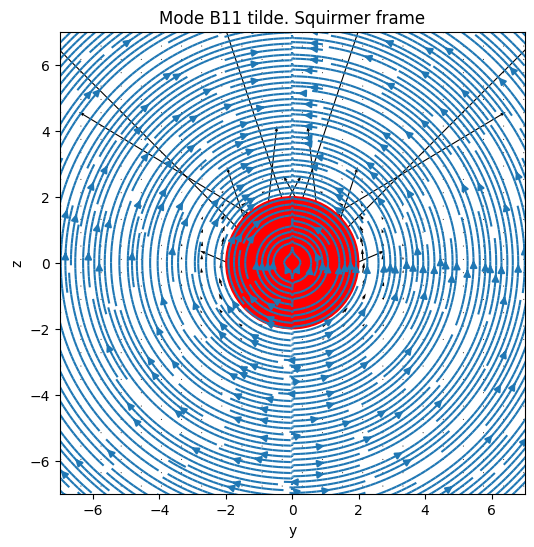

In [28]:
circle1 = plt.Circle((0, 0), 2, color='r')

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])

K = 3*a**3/4
"""
u_r =4/(3*R**3) *np.sin(Theta)
u_t = -2/(3*R**3) *np.cos(Theta)


"""
#u_r =0
#u_t = legendre_poly(1,1,Theta)/(R**2*np.sin(Theta))*(-1)



#u_z = legendre_poly(1,1,Theta)/(R**2) #np.cos(Theta) * u_r - np.sin(Theta) * u_t 
#u_y = -legendre_poly(1,1,Theta)/(R**2)*np.cos(Theta)/np.sin(Theta) #u_r*np.sin(Theta) + u_t*np.cos(Theta)


skip = (slice(None, None, 2), slice(None, None, 3))
plt.quiver(Z[skip], Y[skip], u_z[skip], u_y[skip])
ax.streamplot(Z, Y, u_z, u_y, density = 4)


ax.add_patch(circle1)

plt.xlabel("y")
plt.ylabel("z")
plt.title("Mode B11 tilde. Squirmer frame")

In [82]:
u_y, u_z, u_size = field_car(0.2, np.pi/4, 2, B)


In [35]:
u_y, u_z

(62.5, 687.5)

In [104]:
np.zeros((4,4))[1,1]


0.0